In [2]:
# Load chat file
with open('D:\WhatsApp Chat with Tamil AI Data Science Community\WhatsApp Chat with Tamil AI Data Science Community .txt', "r", encoding="utf-8") as file:
    chat_data = file.read()

# Display first 500 characters
chat_data[:500]

'2/26/25, 8:25\u202fPM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n2/6/25, 11:45\u202fAM - ~\u202fThiru created group "Tamil AI Data Science Community "\n2/26/25, 8:25\u202fPM - You joined using this group\'s invite link\n2/26/25, 8:31\u202fPM - +91 75503 62274: Bro data analytics roadmap sollunga bro\n2/26/25, 8:31\u202fPM - +91 63806 54780: Will post bro\n2/26/25, 8:38\u202fPM - ~\u202fRegadharani was added\n2/26/25, 8:37\u202fPM - +91 63694 76213 joined using a group l'

In [3]:
!pip install spacy textblob wordcloud matplotlib seaborn
!python -m spacy download en_core_web_sm

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.3 MB/s  0:00:00

   -------------------- ------------------- 1/2 [textblob]
   ---------------------------------------- 2/2 [textblob]

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 3.4 MB/s eta 0:00:04
     ------ --------------------------------- 2.1/12.8 MB 3.2 MB/s eta 0:00:04
     --------- ------------------------------ 2.9/12.8 MB 3.3 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 3.3 MB/s eta 0:00:03
     ------------- -------------------------- 4.5

In [8]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Convert chat text to spaCy doc
doc = nlp(chat_data)

# Tokenization + Lowercasing + Remove stopwords and non-alpha tokens
tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

# Check first 20 tokens
tokens[:50]


['pm',
 'message',
 'call',
 'end',
 'end',
 'encrypt',
 'people',
 'chat',
 'read',
 'listen',
 'share',
 'learn',
 'thiru',
 'create',
 'group',
 'tamil',
 'ai',
 'data',
 'science',
 'community',
 'pm',
 'join',
 'group',
 'invite',
 'link',
 'pm',
 'bro',
 'datum',
 'analytic',
 'roadmap',
 'sollunga',
 'bro',
 'pm',
 'post',
 'bro',
 'pm',
 'regadharani',
 'add',
 'pm',
 'join',
 'group',
 'link',
 'pm',
 'harish',
 'add',
 'pm',
 'join',
 'group',
 'link',
 'pm']

In [9]:
from collections import Counter

word_freq = Counter(tokens)
word_freq.most_common(20)


[('pm', 3356),
 ('link', 689),
 ('join', 675),
 ('group', 670),
 ('bro', 634),
 ('add', 356),
 ('ai', 336),
 ('medium', 231),
 ('omit', 229),
 ('use', 227),
 ('message', 200),
 ('learn', 199),
 ('model', 152),
 ('datum', 147),
 ('project', 147),
 ('good', 143),
 ('la', 139),
 ('ml', 130),
 ('work', 130),
 ('need', 130)]

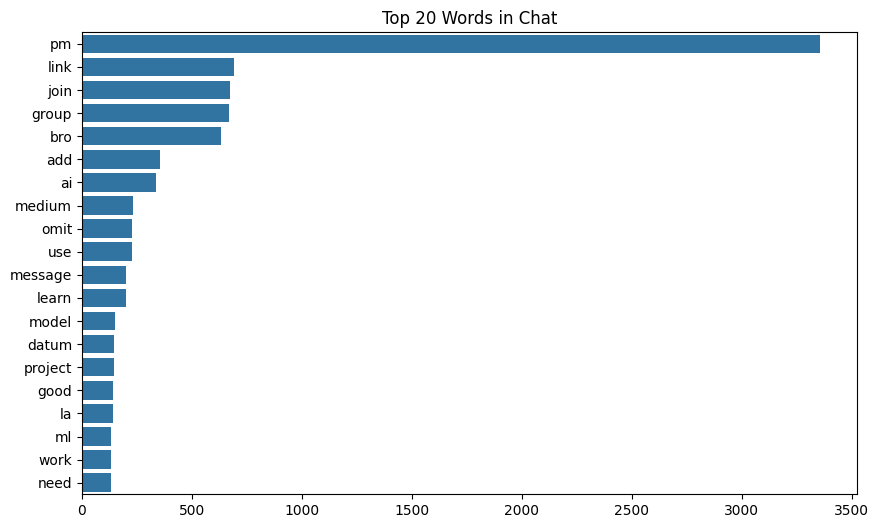

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Words in Chat")
plt.show()


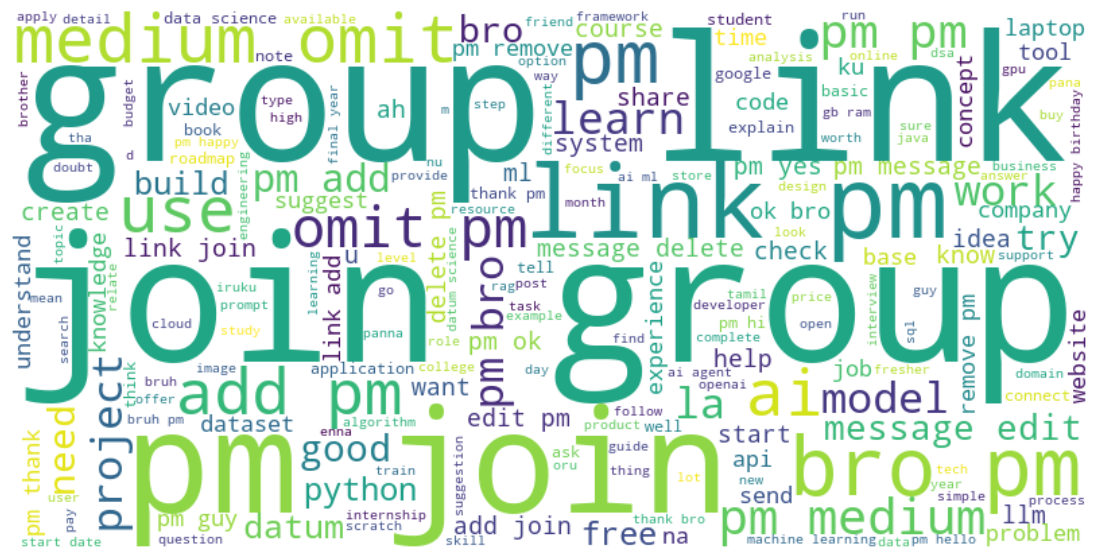

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
from textblob import TextBlob

blob = TextBlob(chat_data)
print("Polarity (-1 negative to 1 positive):", blob.sentiment.polarity)
print("Subjectivity (0 objective to 1 subjective):", blob.sentiment.subjectivity)


Polarity (-1 negative to 1 positive): 0.22060522878072816
Subjectivity (0 objective to 1 subjective): 0.48655878753129916


In [13]:
for ent in doc.ents:
    print(ent.text, ent.label_)

2/26/25 CARDINAL
8:25 TIME
2/6/25 CARDINAL
11:45 AM - ~ TIME
Tamil AI Data Science Community ORG
2/26/25 CARDINAL
8:25 TIME
2/26/25, 8:31 PM - +91 75503 TIME
2/26/25 CARDINAL
63806 54780 DATE
2/26/25 CARDINAL
8:38  TIME
Regadharani PERSON
2/26/25 CARDINAL
8:37  TIME
63694 76213 DATE
2/26/25, 9:21 PM - ~ TIME
Harish GPE
2/26/25 CARDINAL
44697 DATE
2/26/25 CARDINAL
9:23  TIME
44697 DATE
ML ORG
2/26/25, 9:26 PM - +91 TIME
63806 54780 DATE
9:30 PM - +91 TIME
44697 DATE
2/26/25 CARDINAL
9:33 PM - +91 TIME
63806 54780 DATE
2/26/25 CARDINAL
9:34 PM - +91 TIME
63806 54780 DATE
2/26/25 CARDINAL
9:34 PM - +91 TIME
63806 54780 DATE
2/26/25 CARDINAL
44697 DATE
2/26/25 CARDINAL
11:08 PM - +91 TIME
29944 DATE
anaconda GPE
2/26/25 CARDINAL
11:10 PM - +91 TIME
29944 DATE
anaconda GPE
2/26/25 CARDINAL
11:10 PM - +91 TIME
29944 DATE
2/26/25 CARDINAL
11:40 PM - +91 TIME
96002 48050 DATE
2/27/25 CARDINAL
1:49  TIME
44697 DATE
2/27/25 CARDINAL
2:21 PM - +91 TIME
86696 DATE
2/27/25 CARDINAL
2:21 PM - +91 TI